In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress



import warnings
warnings.filterwarnings('ignore')
print("All dependencies are imported.")

All dependencies are imported.


1.数据基本处理

In [2]:
data=pd.read_csv("gt_full.csv")
print("Gas Turbine Dataset:")
display(data)

Gas Turbine Dataset:


Unnamed: 0      AT      AP      AH    AFDP    GTEP     TIT     TAT  \
0               1  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83   
1               2  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05   
2               3  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19   
3               4  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17   
4               5  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00   
...           ...     ...     ...     ...     ...     ...     ...     ...   
36728       36729  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59   
36729       36730  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28   
36730       36731  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48   
36731       36732  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11   
36732       36733  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23   

          TEY     CDP        CO      NOX  
0      134.67  11.898   0.32663   81.952  
1      134.67  11.892   0.44784   82.377  
2      135.10  12.042   0.45144   83.776  
3      135.03  11.990   0.23107   82.505  
4      134.67  11.910   0.26747   82.028  
...       ...     ...       ...      ...  
36728  109.08  10.411  10.99300   89.172  
36729  108.79  10.344  11.14400   88.849  
36730  107.81  10.462  11.41400   96.147  
36731  131.41  11.771   3.31340   64.738  
36732  125.41  11.462  11.98100  109.240  

[36733 rows x 12 columns]

In [3]:
data=data.drop("Unnamed: 0", axis=1)
print("Dropping unnecessary columns:")
display(data)


print("Columns in Dataframe:")
cols=data.columns
display(cols)

Dropping unnecessary columns:


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  
0       0.32663   81.952  
1       0.44784   82.377  
2       0.45144   83.776  
3       0.23107   82.505  
4       0.26747   82.028  
...         ...      ...  
36728  10.99300   89.172  
36729  11.14400   88.849  
36730  11.41400   96.147  
36731   3.31340   64.738  
36732  11.98100  109.240  

[36733 rows x 11 columns]

Columns in Dataframe:


Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [4]:
print("Dataset description:")
display(data.describe())

Dataset description:


AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

In [5]:
print("Dataset information:")
display(data.info())
print()
print("Null values count:")
display(data.isnull().sum())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


None


Null values count:


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

数据可视化

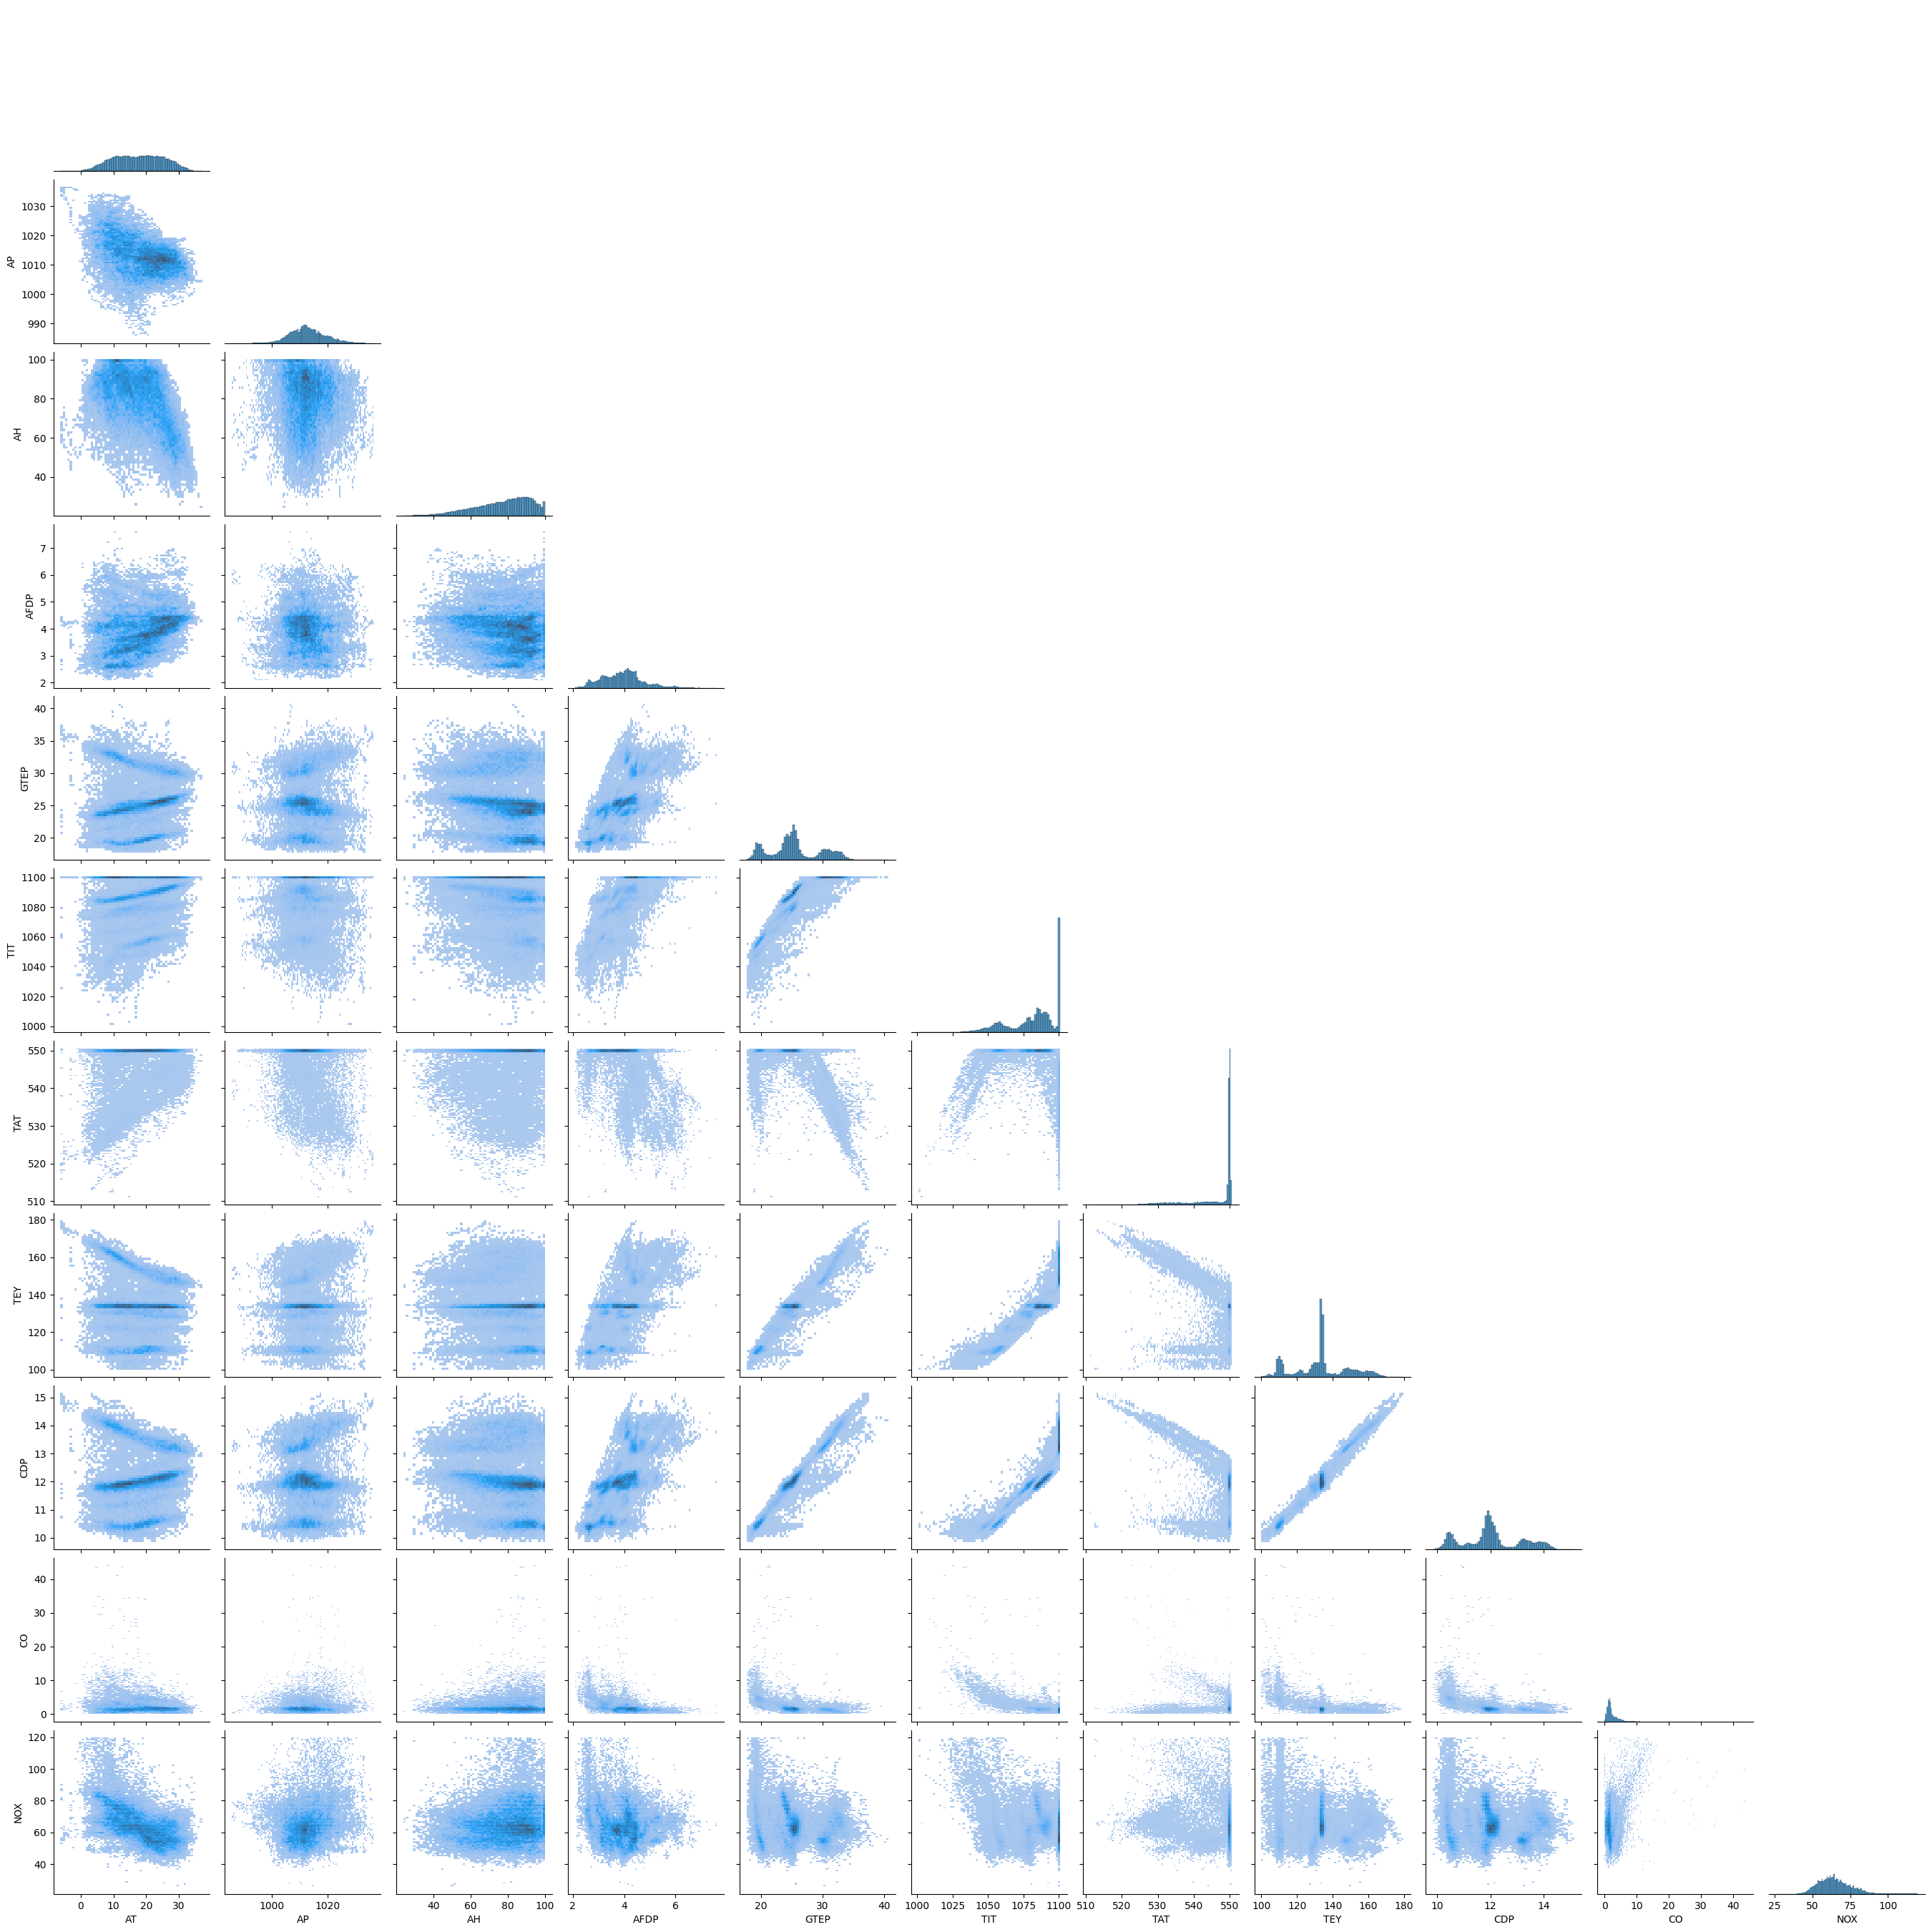

In [6]:
sns.pairplot(data, corner=True, kind='hist');

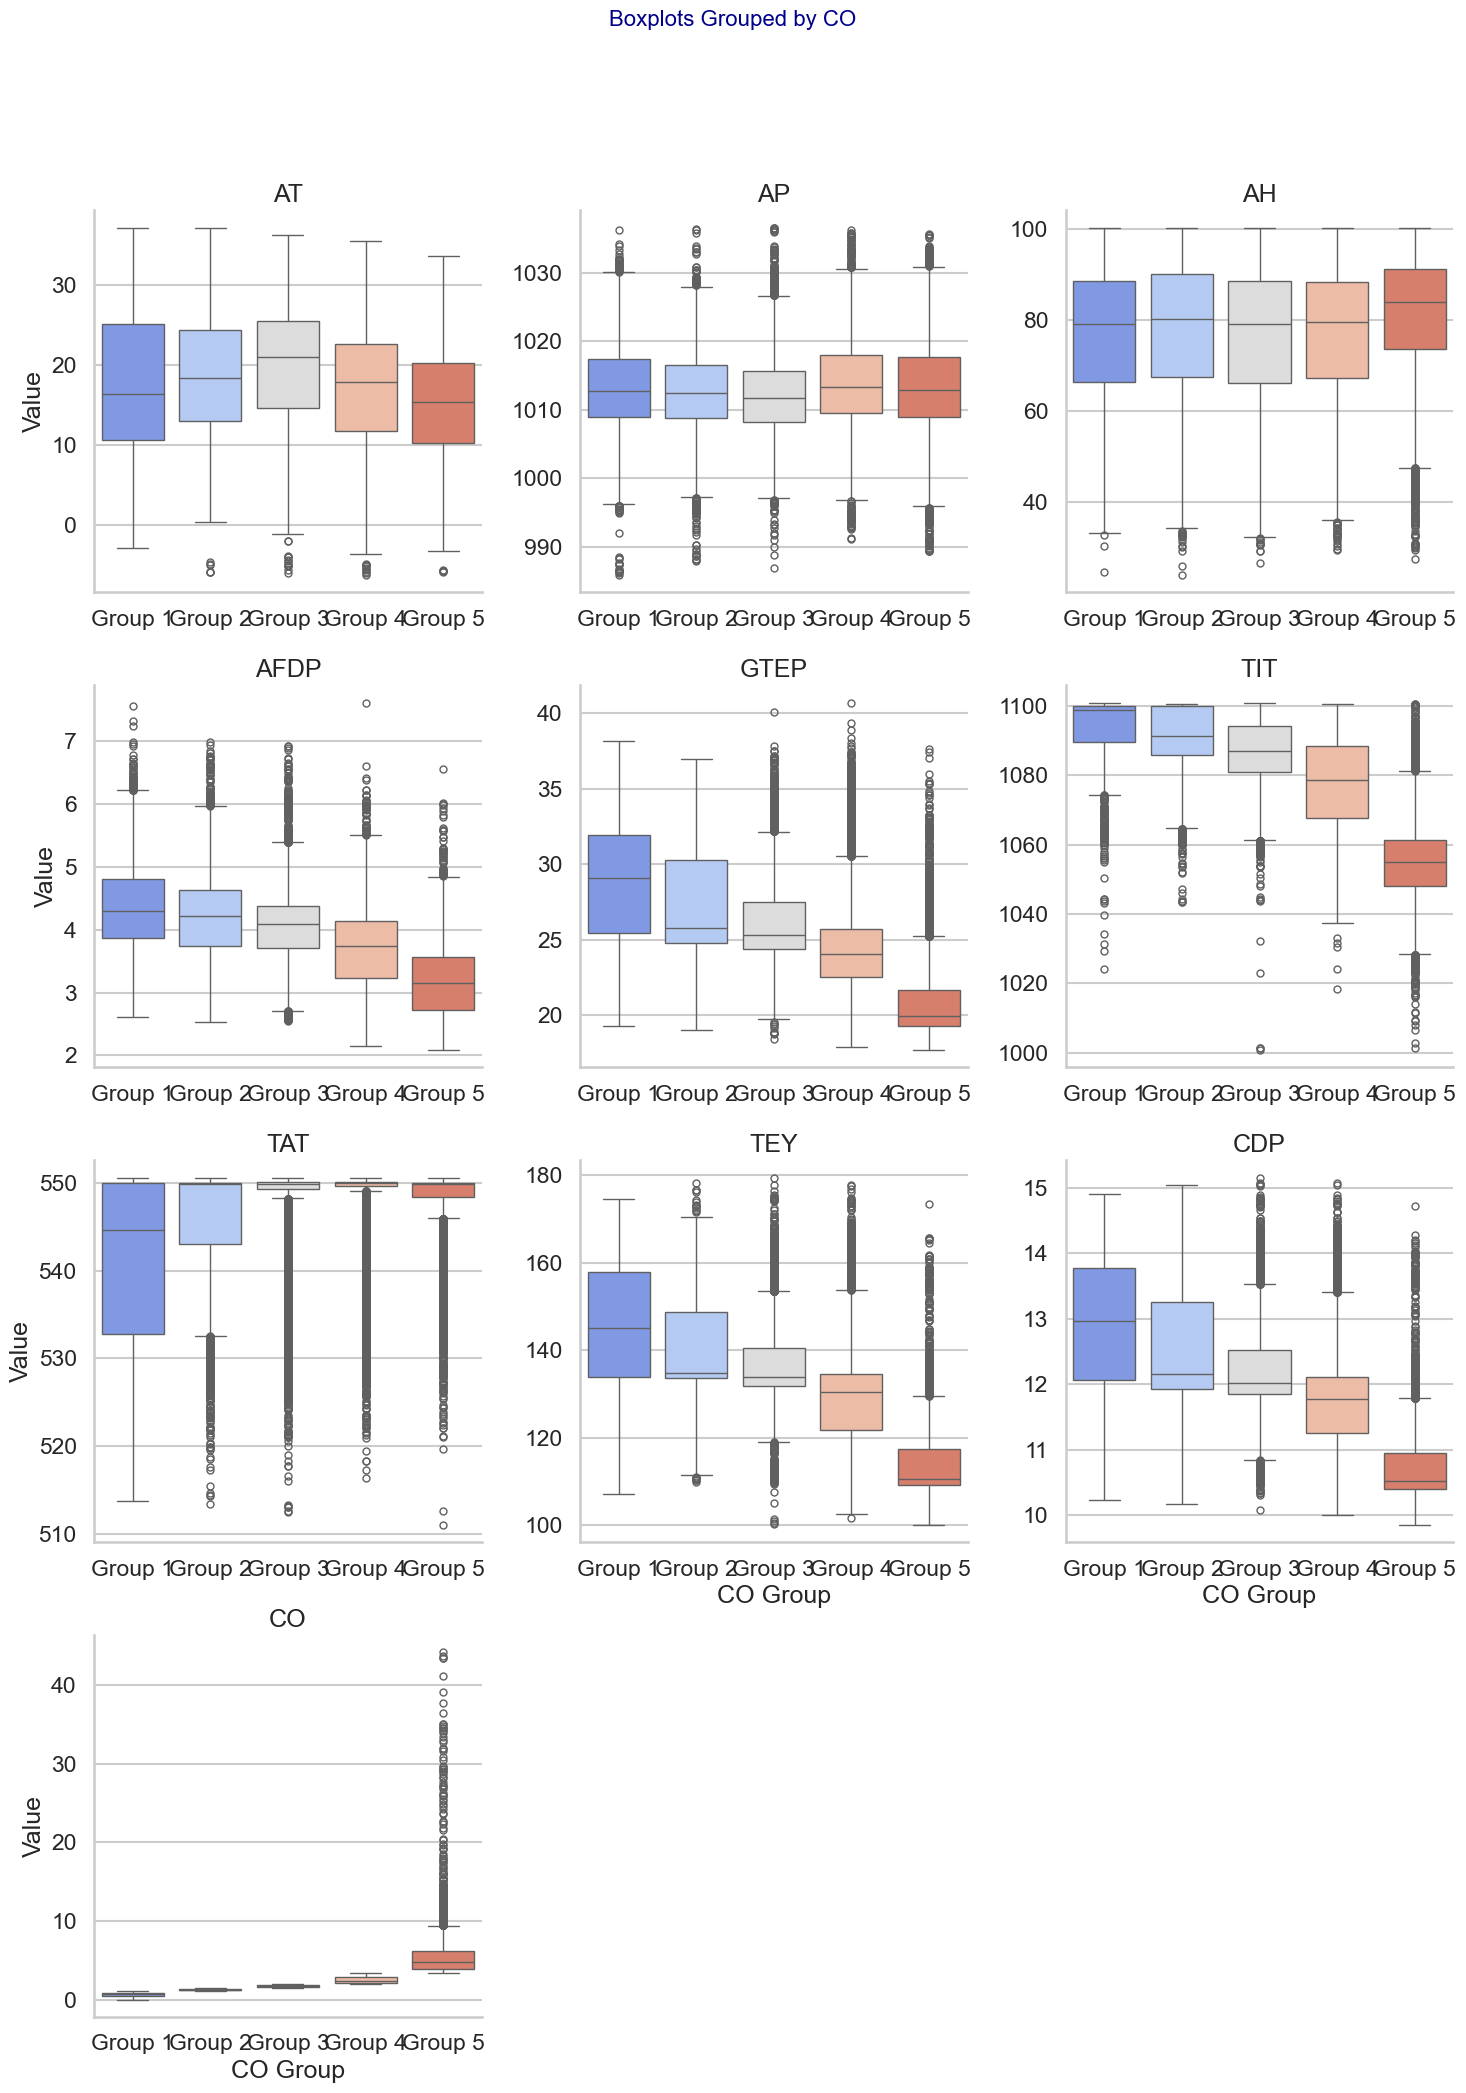

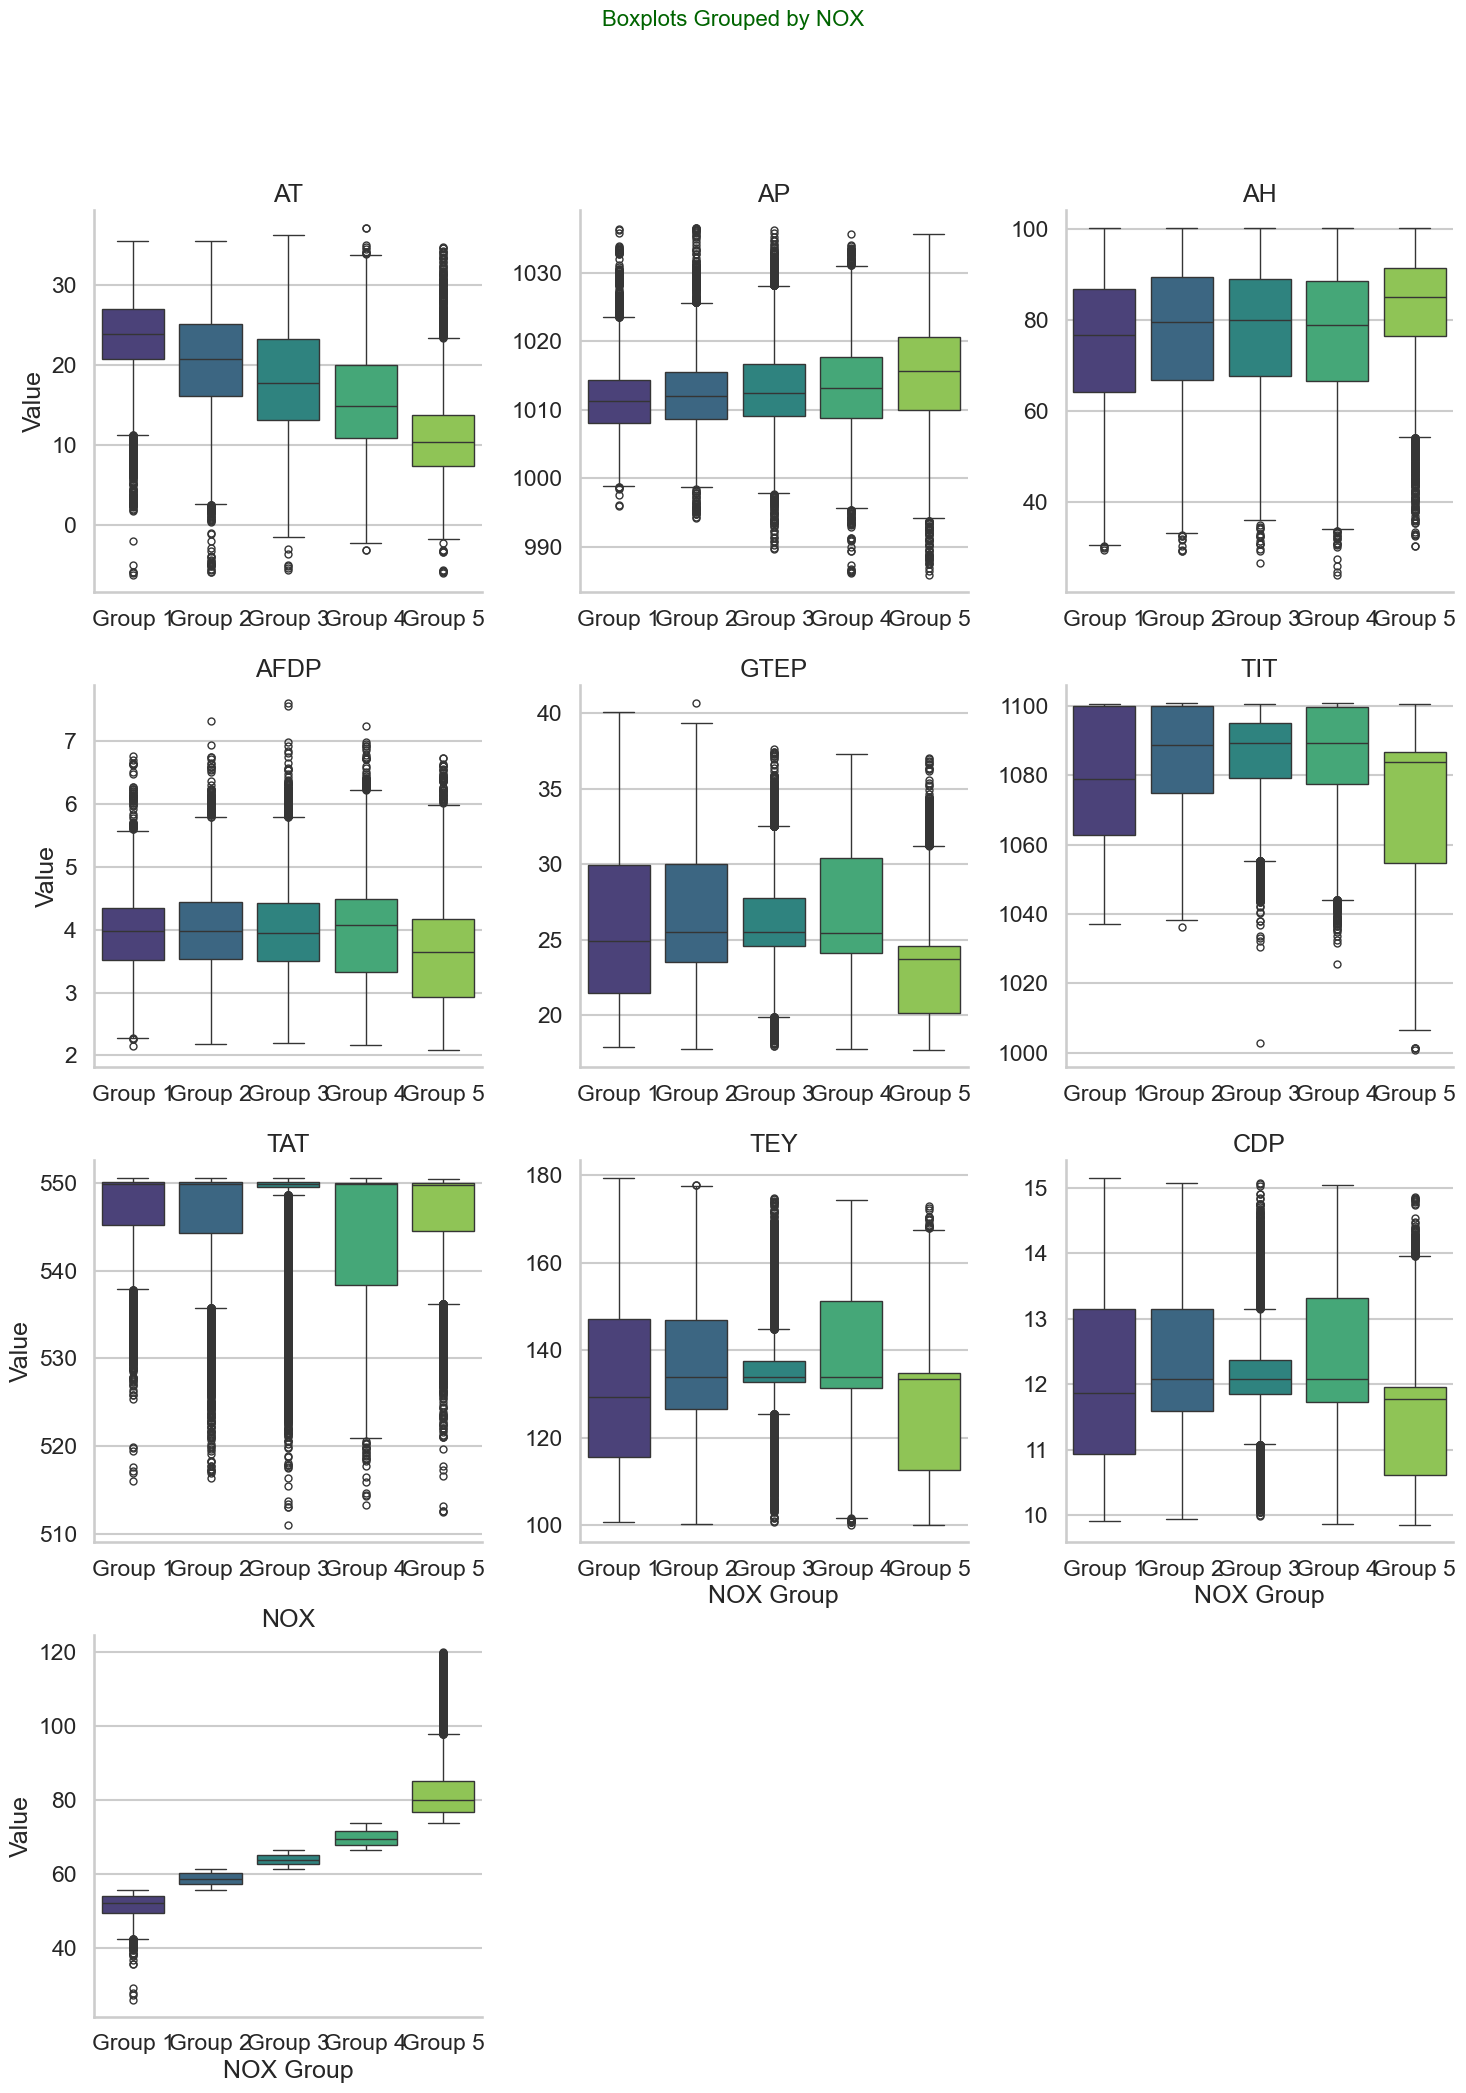

In [7]:
# 假设原始数据为 data
data_copy = data.copy()

# 1. 将 CO 分组为 5 组（分位数分组）
co_bins = pd.qcut(data_copy['CO'], q=5, labels=[f'Group {i+1}' for i in range(5)])

# 2. 将 NO 分组为 5 组（分位数分组）
no_bins = pd.qcut(data_copy['NOX'], q=5, labels=[f'Group {i+1}' for i in range(5)])

# 3. 准备第一组数据（CO 分组）
data_co_grouped = (
    data_copy.drop(columns=['NOX'])  # 先移除 NO 列，它不参与第一组分析
    .assign(CO_group=co_bins)       # 添加分组列（CO 的分组）
    .melt(id_vars=['CO_group'], var_name='variable', value_name='value')  # 转换为长格式
)

# 4. 准备第二组数据（NO 分组）
data_no_grouped = (
    data_copy.drop(columns=['CO'])  # 先移除 CO 列，它不参与第二组分析
    .assign(NOX_group=no_bins)       # 添加分组列（NO 的分组）
    .melt(id_vars=['NOX_group'], var_name='variable', value_name='value')  # 转换为长格式
)

sns.set_theme(style="whitegrid", context="talk", palette="pastel")

# 第一组箱型图（按 CO 分组）
g1 = sns.catplot(
    x='CO_group',
    y='value',
    data=data_co_grouped,
    col='variable',
    kind='box',
    col_wrap=3,
    sharex=False,
    sharey=False,
    palette="coolwarm",  # 使用 coolwarm 调色板
)
g1.fig.suptitle('Boxplots Grouped by CO', y=1.05, fontsize=16, color='darkblue')  # 标题
g1.set_titles("{col_name}")  # 子图标题格式
g1.set_axis_labels("CO Group", "Value")  # 设置轴标签
plt.tight_layout()

# 第二组箱型图（按 NO 分组）
g2 = sns.catplot(
    x='NOX_group',
    y='value',
    data=data_no_grouped,
    col='variable',
    kind='box',
    col_wrap=3,
    sharex=False,
    sharey=False,
    palette="viridis",  # 使用 viridis 调色板
)
g2.fig.suptitle('Boxplots Grouped by NOX', y=1.05, fontsize=16, color='darkgreen')  # 标题
g2.set_titles("{col_name}")  # 子图标题格式
g2.set_axis_labels("NOX Group", "Value")  # 设置轴标签
plt.tight_layout()

In [ ]:
display(data.describe())

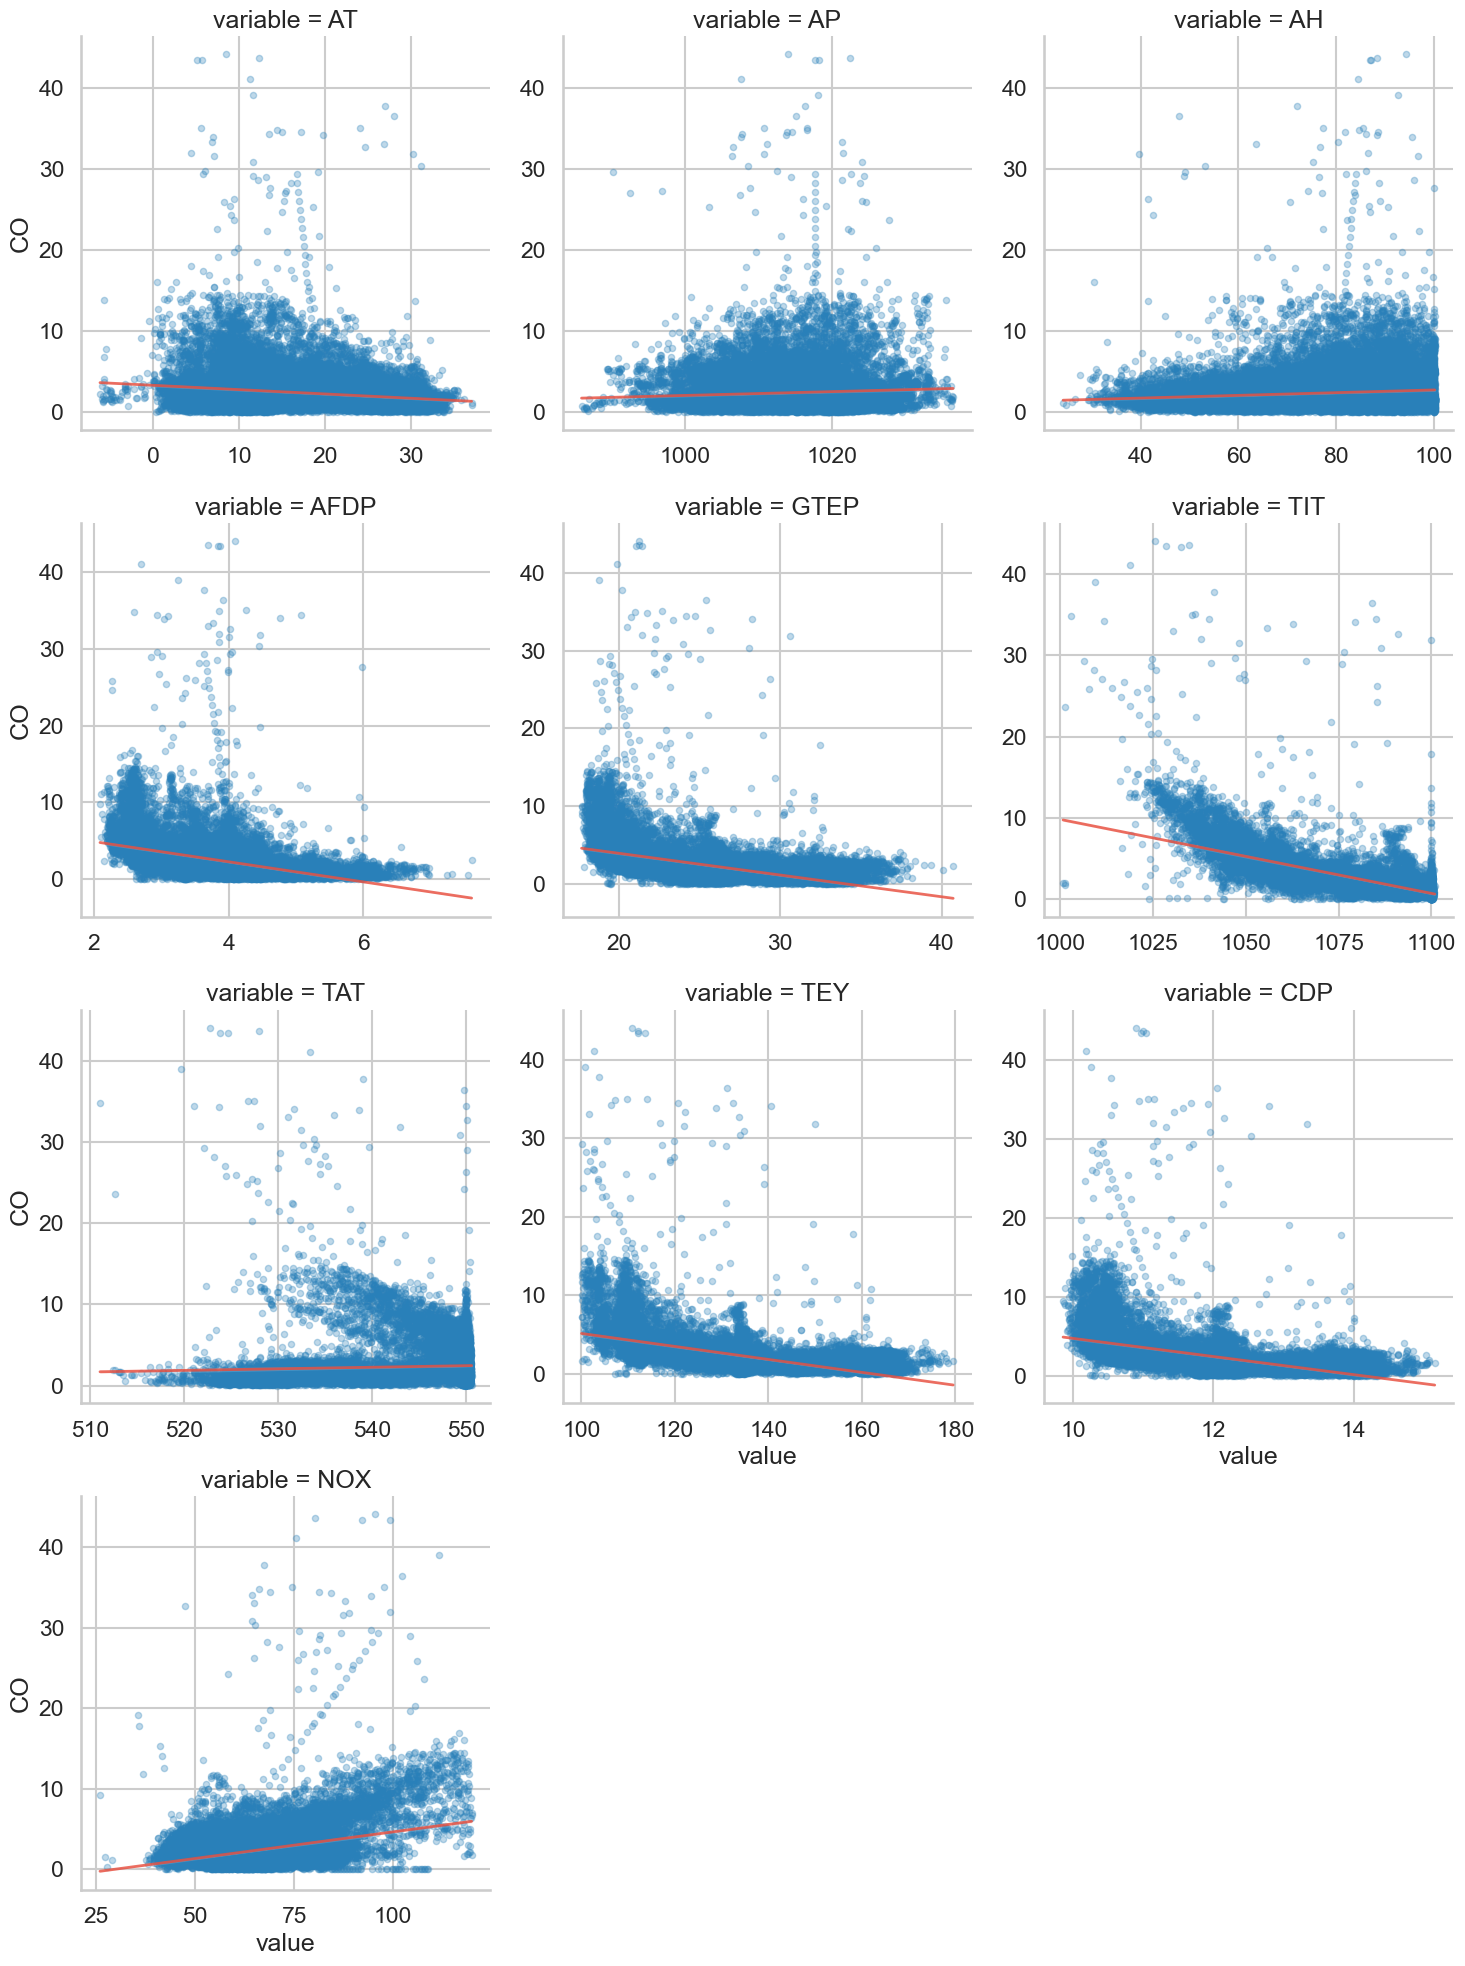

In [8]:
# 设置全局主题
sns.set_theme(style="whitegrid", context="talk", palette="pastel")

# 绘制回归图
ax = sns.lmplot(
    x='value',
    y='CO',
    data=data.melt(id_vars='CO', value_vars=data),
    col='variable',
    col_wrap=3,
    sharex=False, 
    sharey=False,
    line_kws={'color': '#e74c3c', 'lw': 2, 'alpha': 0.8},  # 自定义回归线样式
    scatter_kws={'alpha': 0.3, 'color': '#2980b9', 's': 20},  # 自定义散点样式
)
ax.tight_layout();


In [9]:
from tabulate import tabulate  # 用于美观的表格输出
from matplotlib.patches import Rectangle

# 数据准备
melted_data = data.melt(id_vars='CO', value_vars=data.columns.drop('CO'))

# 创建一个字典存储斜率和相关性
results = []

# 遍历每个特征并计算回归斜率
for variable in melted_data['variable'].unique():
    subset = melted_data[melted_data['variable'] == variable]
    slope, intercept, r_value, p_value, std_err = linregress(subset['value'], subset['CO'])
    correlation = "正相关" if slope > 0 else "负相关"
    results.append({
        "变量": variable,
        "斜率": slope,
        "相关性": correlation,
        "R值": r_value,
        "P值": p_value,
        "标准误差": std_err
    })

# 转换为 DataFrame
results_df = pd.DataFrame(results)
# 输出为漂亮的表格
print(tabulate(results_df, headers="keys", tablefmt="pretty"))

+---+------+----------------------+--------+----------------------+-------------------------+-----------------------+
|   | 变量 |         斜率         | 相关性 |         R值          |           P值           |       标准误差        |
+---+------+----------------------+--------+----------------------+-------------------------+-----------------------+
| 0 |  AT  | -0.05296335433829774 | 负相关 | -0.17432578016135453 | 1.7012220263545399e-248 | 0.0015609757236051743 |
| 1 |  AP  | 0.023472702884440887 | 正相关 | 0.06705002910762077  |  7.106951294467435e-38  | 0.0018225074969257734 |
| 2 |  AH  | 0.016676794979167117 | 正相关 | 0.10658597007540282  |  2.882457142994418e-93  | 0.0008117366135117766 |
| 3 | AFDP |  -1.311010442106779  | 负相关 | -0.44842460854300353 |           0.0           |  0.01363486132981043  |
| 4 | GTEP | -0.2798221426478504  | 负相关 | -0.5189094995335019  |           0.0           | 0.0024052123229417006 |
| 5 | TIT  | -0.0911287946319535  | 负相关 | -0.7062750513575747  |           0.0      

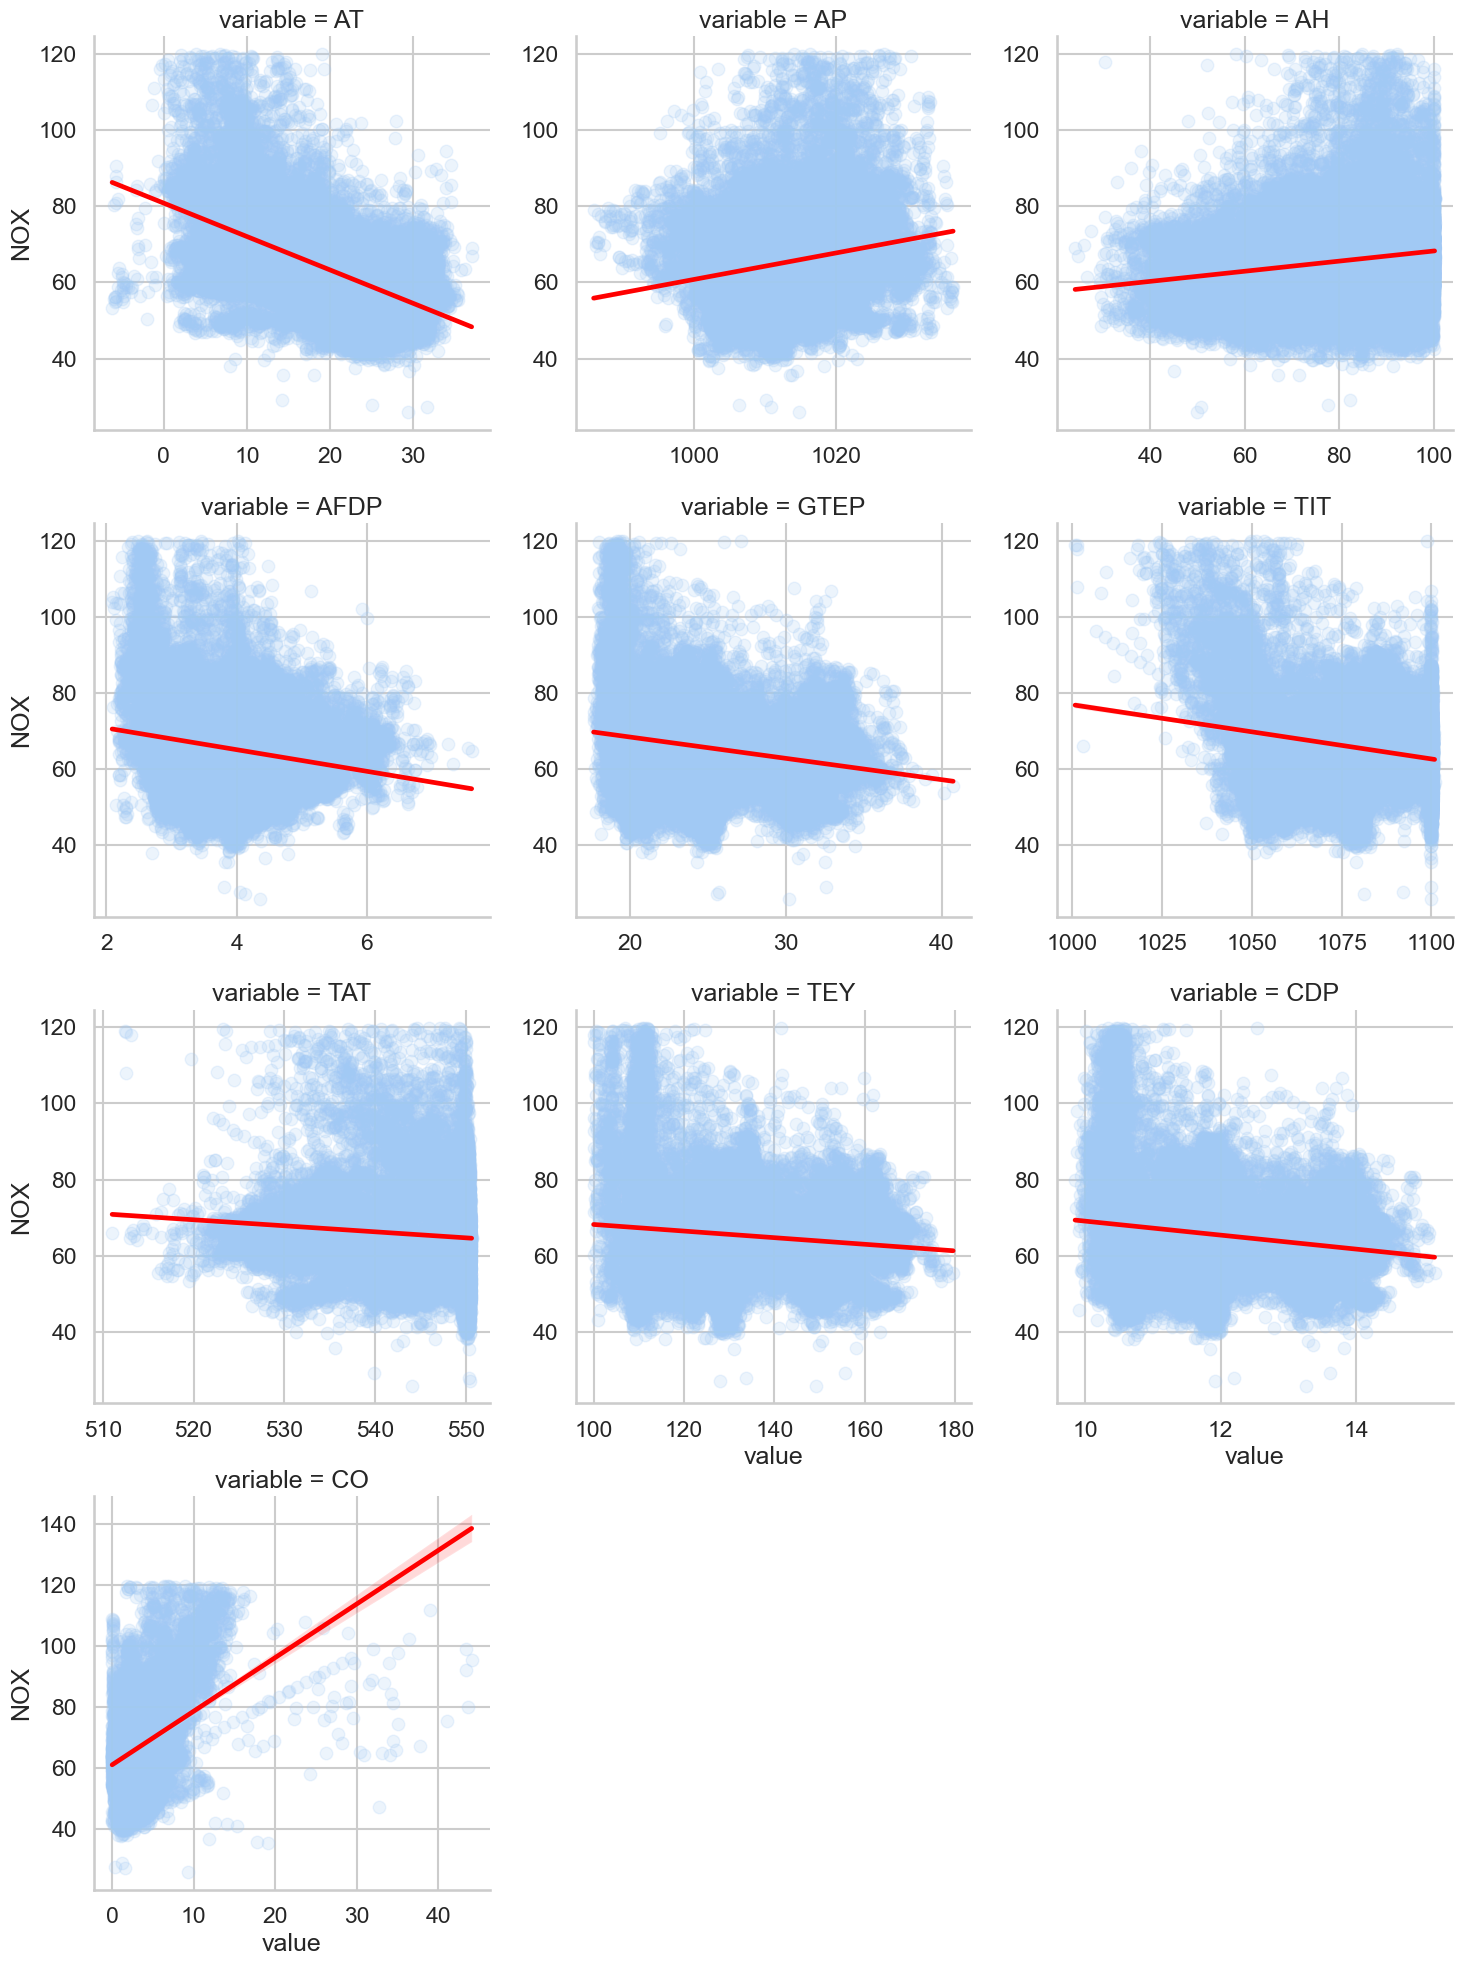

In [10]:
ax = sns.lmplot(
    x='value',
    y='NOX',
    data=data.melt(id_vars='NOX', value_vars=data),
    col='variable',
    col_wrap=3,
    sharex=False, 
    sharey=False,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
ax.tight_layout();

In [11]:
melted_data = data.melt(id_vars='NOX', value_vars=data.columns.drop('NOX'))

# 创建一个字典存储每个特征的斜率
slopes = {}

# 遍历每个特征并计算回归斜率
for variable in melted_data['variable'].unique():
    subset = melted_data[melted_data['variable'] == variable]
    slope, intercept, r_value, p_value, std_err = linregress(subset['value'], subset['NOX'])
    slopes[variable] = slope

# 打印每个特征的相关性
for feature, slope in slopes.items():
    correlation = "正相关" if slope > 0 else "负相关"
    print(f"特征 '{feature}' 与 NOX 的关系：{correlation} (斜率: {slope:.4f})")

特征 'AT' 与 NOX 的关系：负相关 (斜率: -0.8753)
特征 'AP' 与 NOX 的关系：正相关 (斜率: 0.3468)
特征 'AH' 与 NOX 的关系：正相关 (斜率: 0.1329)
特征 'AFDP' 与 NOX 的关系：负相关 (斜率: -2.8406)
特征 'GTEP' 与 NOX 的关系：负相关 (斜率: -0.5612)
特征 'TIT' 与 NOX 的关系：负相关 (斜率: -0.1424)
特征 'TAT' 与 NOX 的关系：负相关 (斜率: -0.1584)
特征 'TEY' 与 NOX 的关系：负相关 (斜率: -0.0868)
特征 'CDP' 与 NOX 的关系：负相关 (斜率: -1.8369)
特征 'CO' 与 NOX 的关系：正相关 (斜率: 1.7580)


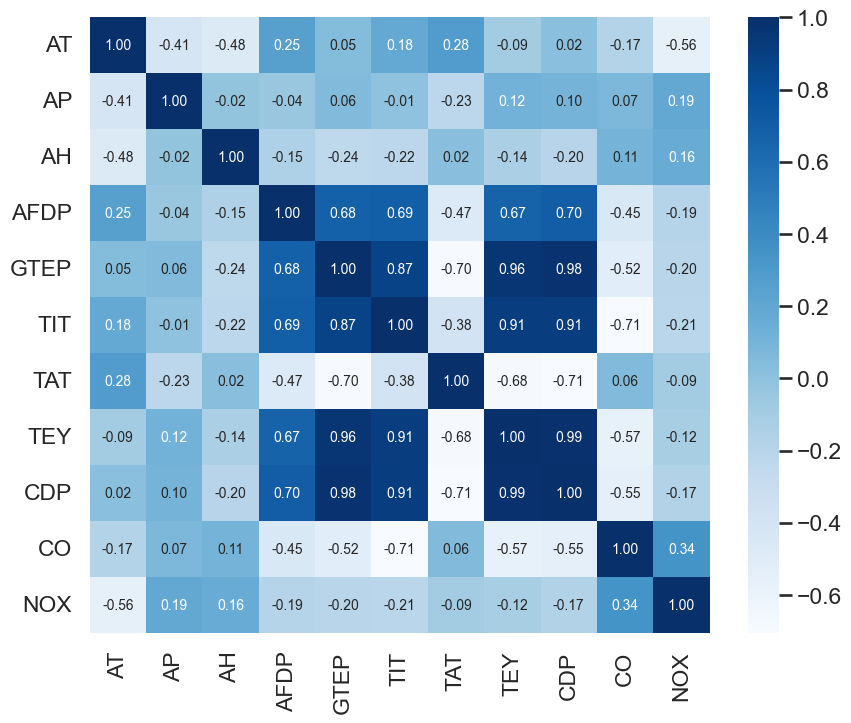

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='Blues', 
    fmt='.2f',
    annot_kws={'fontsize': 10}  # 调整字体大小
)
plt.show()

4.1

In [13]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

X_train = df_train.drop(['CO', 'NOX'], axis=1)
y_train = df_train[['CO', 'NOX']].copy()

# Масштабируем признаки

std = StandardScaler()
X_train_std = std.fit_transform(X_train)

In [ ]:
from collections import defaultdict
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


lin_reg = LinearRegression()
svc_reg = SVR()
tre_reg = DecisionTreeRegressor(random_state=42)
rnd_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42, verbosity=0)
extra_reg = ExtraTreesRegressor(random_state=42)
LGBM_reg = LGBMRegressor()
MLP_reg = MLPRegressor(max_iter=1000, random_state=42)

metrics = defaultdict(dict)
scorers = ['neg_mean_squared_error', 'neg_mean_absolute_error']
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg, 
        rnd_reg,
        xgb_reg,
        extra_reg,
        LGBM_reg,
        MLP_reg
        ):
        scores = cross_validate(reg, X_train_std, y_train[feature], scoring=scorers, n_jobs=-1)
        metrics[reg.__class__.__name__] = {
            **metrics[reg.__class__.__name__], 
            **{
                f'{feature}_rmse': np.sqrt(-scores['test_neg_mean_squared_error']).mean(),
                f'{feature}_rmse_std': np.sqrt(-scores['test_neg_mean_squared_error']).std(),
                f'{feature}_mae': -scores['test_neg_mean_absolute_error'].mean(),
                f'{feature}_mae_std': scores['test_neg_mean_absolute_error'].std()
            }}

In [15]:
def display_metrics(metrics):
    return (pd.DataFrame(metrics).T.apply(pd.to_numeric).style.format('{:.3f}')
            .background_gradient(cmap=plt.get_cmap('PuBu'), axis=0))

display_metrics(metrics)

显而易见，RandomForestRegressor 展现了最佳的结果，XGBRegressor 的结果稍逊一筹。接下来，我们看看特征的重要性

In [16]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.title(f'importance for {model.__class__.__name__}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])

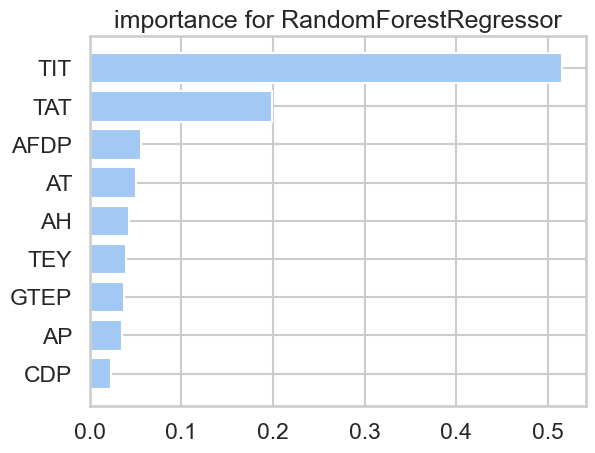

In [17]:
rnd_reg.fit(X_train_std, y_train['CO'])
plot_feature_importance(rnd_reg)

对于 CO，关键特征是环境空气的温度

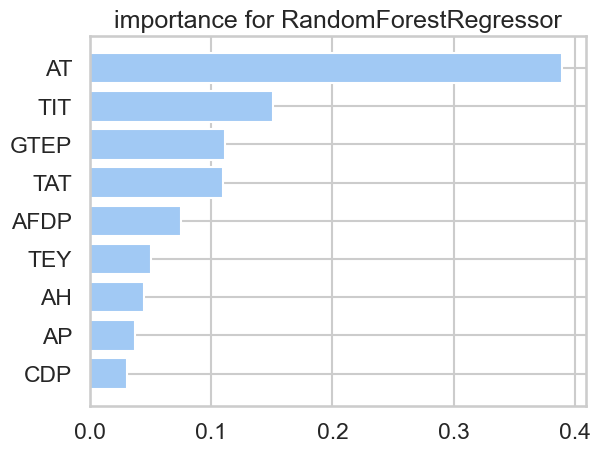

In [18]:
rnd_reg.fit(X_train_std, y_train['NOX'])
plot_feature_importance(rnd_reg)

对于 NOX，关键特征是环境空气的温度

4.2使用四分位距方法去除异常值

In [19]:
def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [20]:
boundaries = pd.DataFrame(calculate_iqr_boundaries(X_train))
boundaries

AT       AP          AH      AFDP       GTEP     TIT        TAT  \
0  -5.987   996.65   36.765125  1.814862  14.074125  1033.5  536.67125   
1  41.451  1029.05  120.942125  5.919563  38.101125  1135.1  558.06125   

      TEY        CDP  
0   94.53   9.259375  
1  173.95  15.034375

In [21]:
features_max = [f for f in boundaries.columns if (X_train[f]>boundaries[f].max()).sum()]
features_min = [f for f in boundaries.columns if (X_train[f]<boundaries[f].min()).sum()]

for f in features_max:
    X_train[f][X_train[f] > boundaries[f][1]] = boundaries[f][1]

for f in features_min:
    X_train[f][X_train[f] < boundaries[f][0]] = boundaries[f][0]

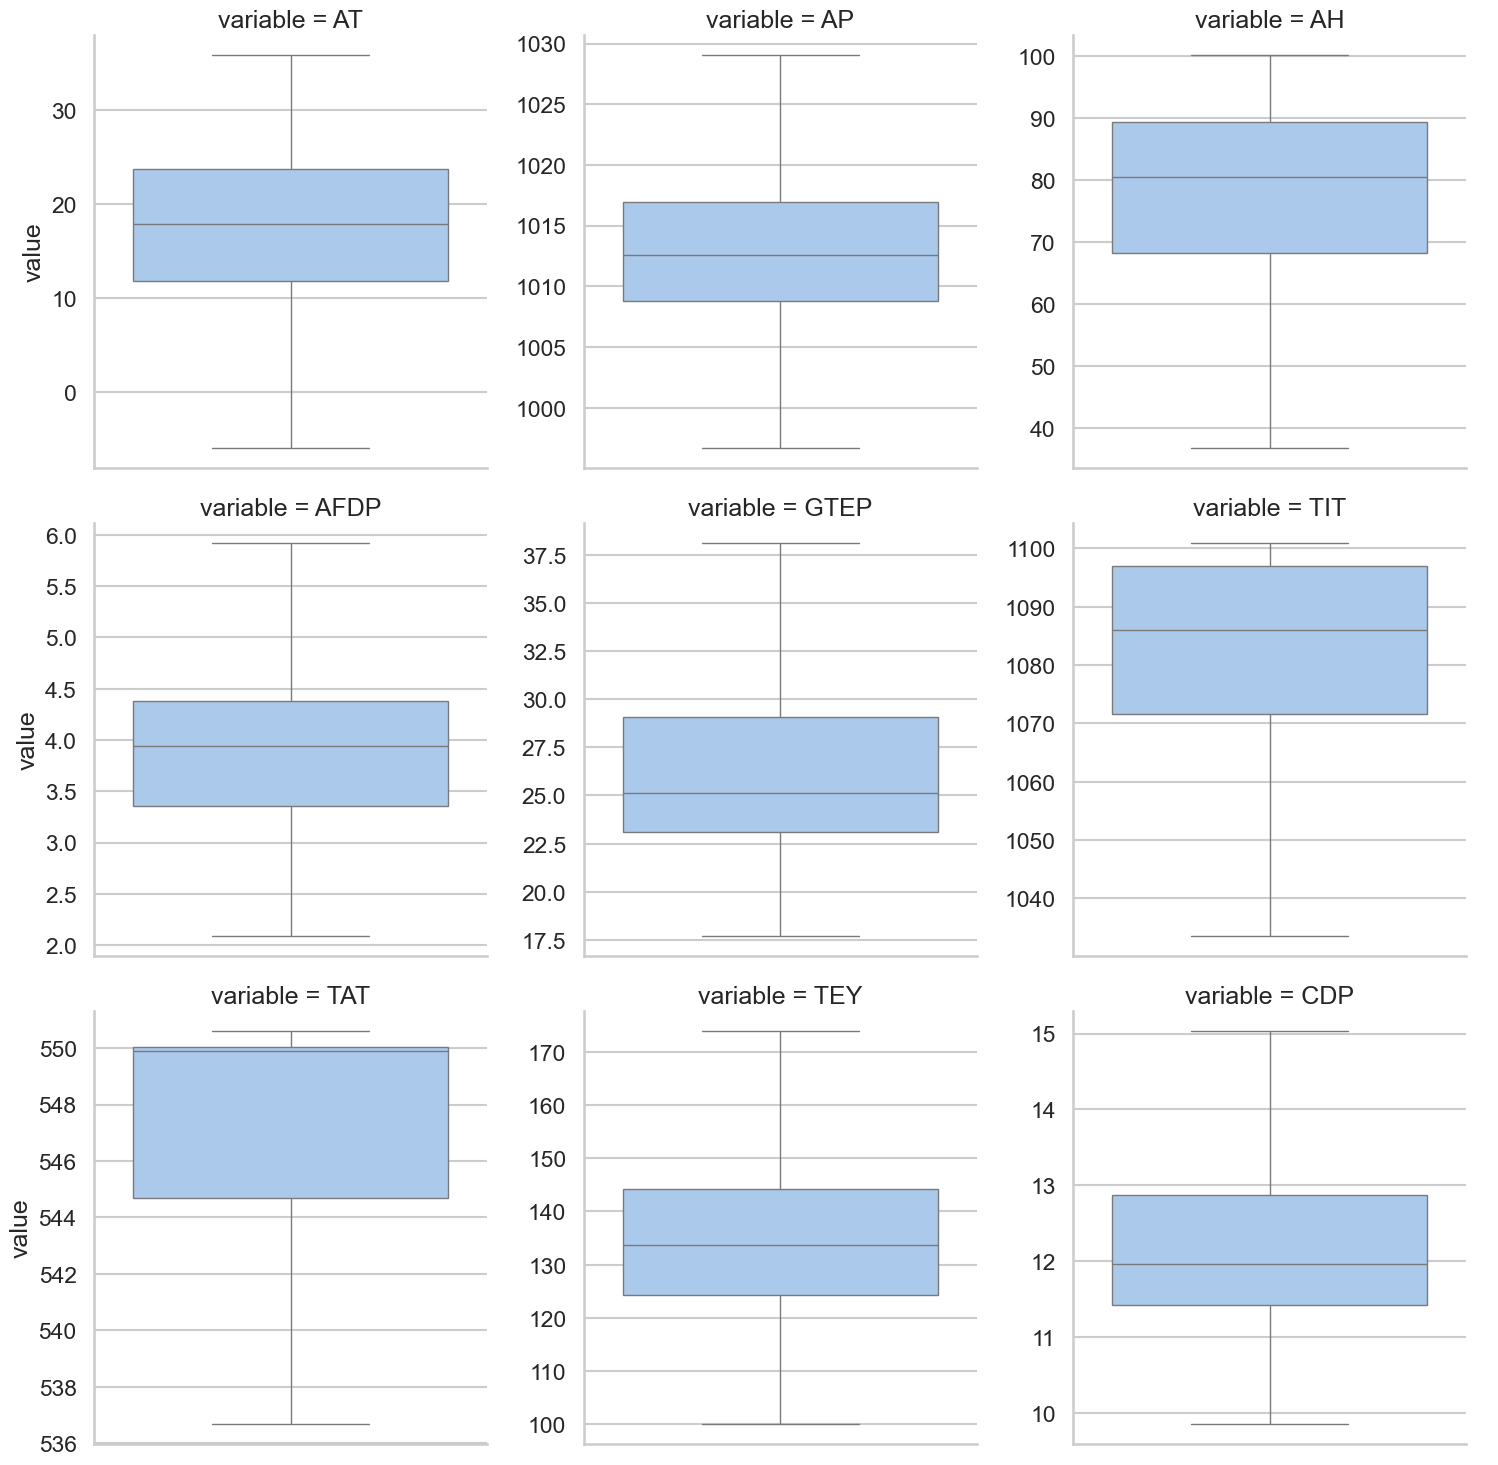

In [22]:
sns.catplot(
    y='value',
    data=X_train.melt(value_vars=X_train.columns),
    col='variable',
    kind='box',
    col_wrap=3,
    sharex=False, 
    sharey=False,
);

In [23]:
X_train_std = std.fit_transform(X_train)


metrics1 = defaultdict(dict)
scorers = ['neg_mean_squared_error', 'neg_mean_absolute_error']
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg, 
        rnd_reg,
        xgb_reg,
        extra_reg,
        LGBM_reg,
        MLP_reg
        ):
        scores = cross_validate(reg, X_train_std, y_train[feature], scoring=scorers, n_jobs=-1)
        metrics1[reg.__class__.__name__] = {
            **metrics1[reg.__class__.__name__], 
            **{
                f'{feature}_rmse': np.sqrt(-scores['test_neg_mean_squared_error']).mean(),
                f'{feature}_rmse_std': np.sqrt(-scores['test_neg_mean_squared_error']).std(),
                f'{feature}_mae': -scores['test_neg_mean_absolute_error'].mean(),
                f'{feature}_mae_std': scores['test_neg_mean_absolute_error'].std()
            }}

display_metrics(metrics1)

In [24]:
def diff_metrics(a, b):
    a1 = pd.DataFrame(a).apply(pd.to_numeric)
    b1 = pd.DataFrame(b).apply(pd.to_numeric)
    columns = a.keys()
    index = list(a.values())[0].keys()
    diff = pd.DataFrame((a1.values - b1.values)/b1.values*100, columns=columns, index=index)
    return diff.T.style.format('{:.2f}').background_gradient(cmap=plt.get_cmap('coolwarm'), axis=None, vmin=-10, vmax=10)

diff_metrics(metrics1, metrics)

变化并不显著，甚至在某些参数上变得更糟。这有一个简单的解释：我们删除了特征中的异常值，但目标值中仍然存在大量异常值。为了改善这种情况，我们需要弄清楚哪些对象可以被视为异常值并排除它们，而仅对正确的值进行训练。为此，我们尝试使用 DBSCAN 聚类方法。

4.3 使用 DBSCAN 删除异常值
步骤:
以下是我们将要尝试的步骤：

使用 DBSCAN 在整个训练数据集中检测异常值；
仅使用训练数据中 核心样本（central samples）的索引来训练模型；
使用 最近邻方法（k-Nearest Neighbors，kNN）学习如何在测试数据中预测异常值。

In [25]:
df_train_std = StandardScaler().fit_transform(df_train)
df_train_std = pd.DataFrame(df_train_std, columns=df_train.columns, index=df_train.index)

db = DBSCAN(eps=1.9, min_samples=40, n_jobs=-1)
db.fit(df_train_std)

unique, counts = np.unique(db.labels_, return_counts=True)
np.c_[unique, counts]

array([[   -1,   138],
       [    0, 29248]], dtype=int64)

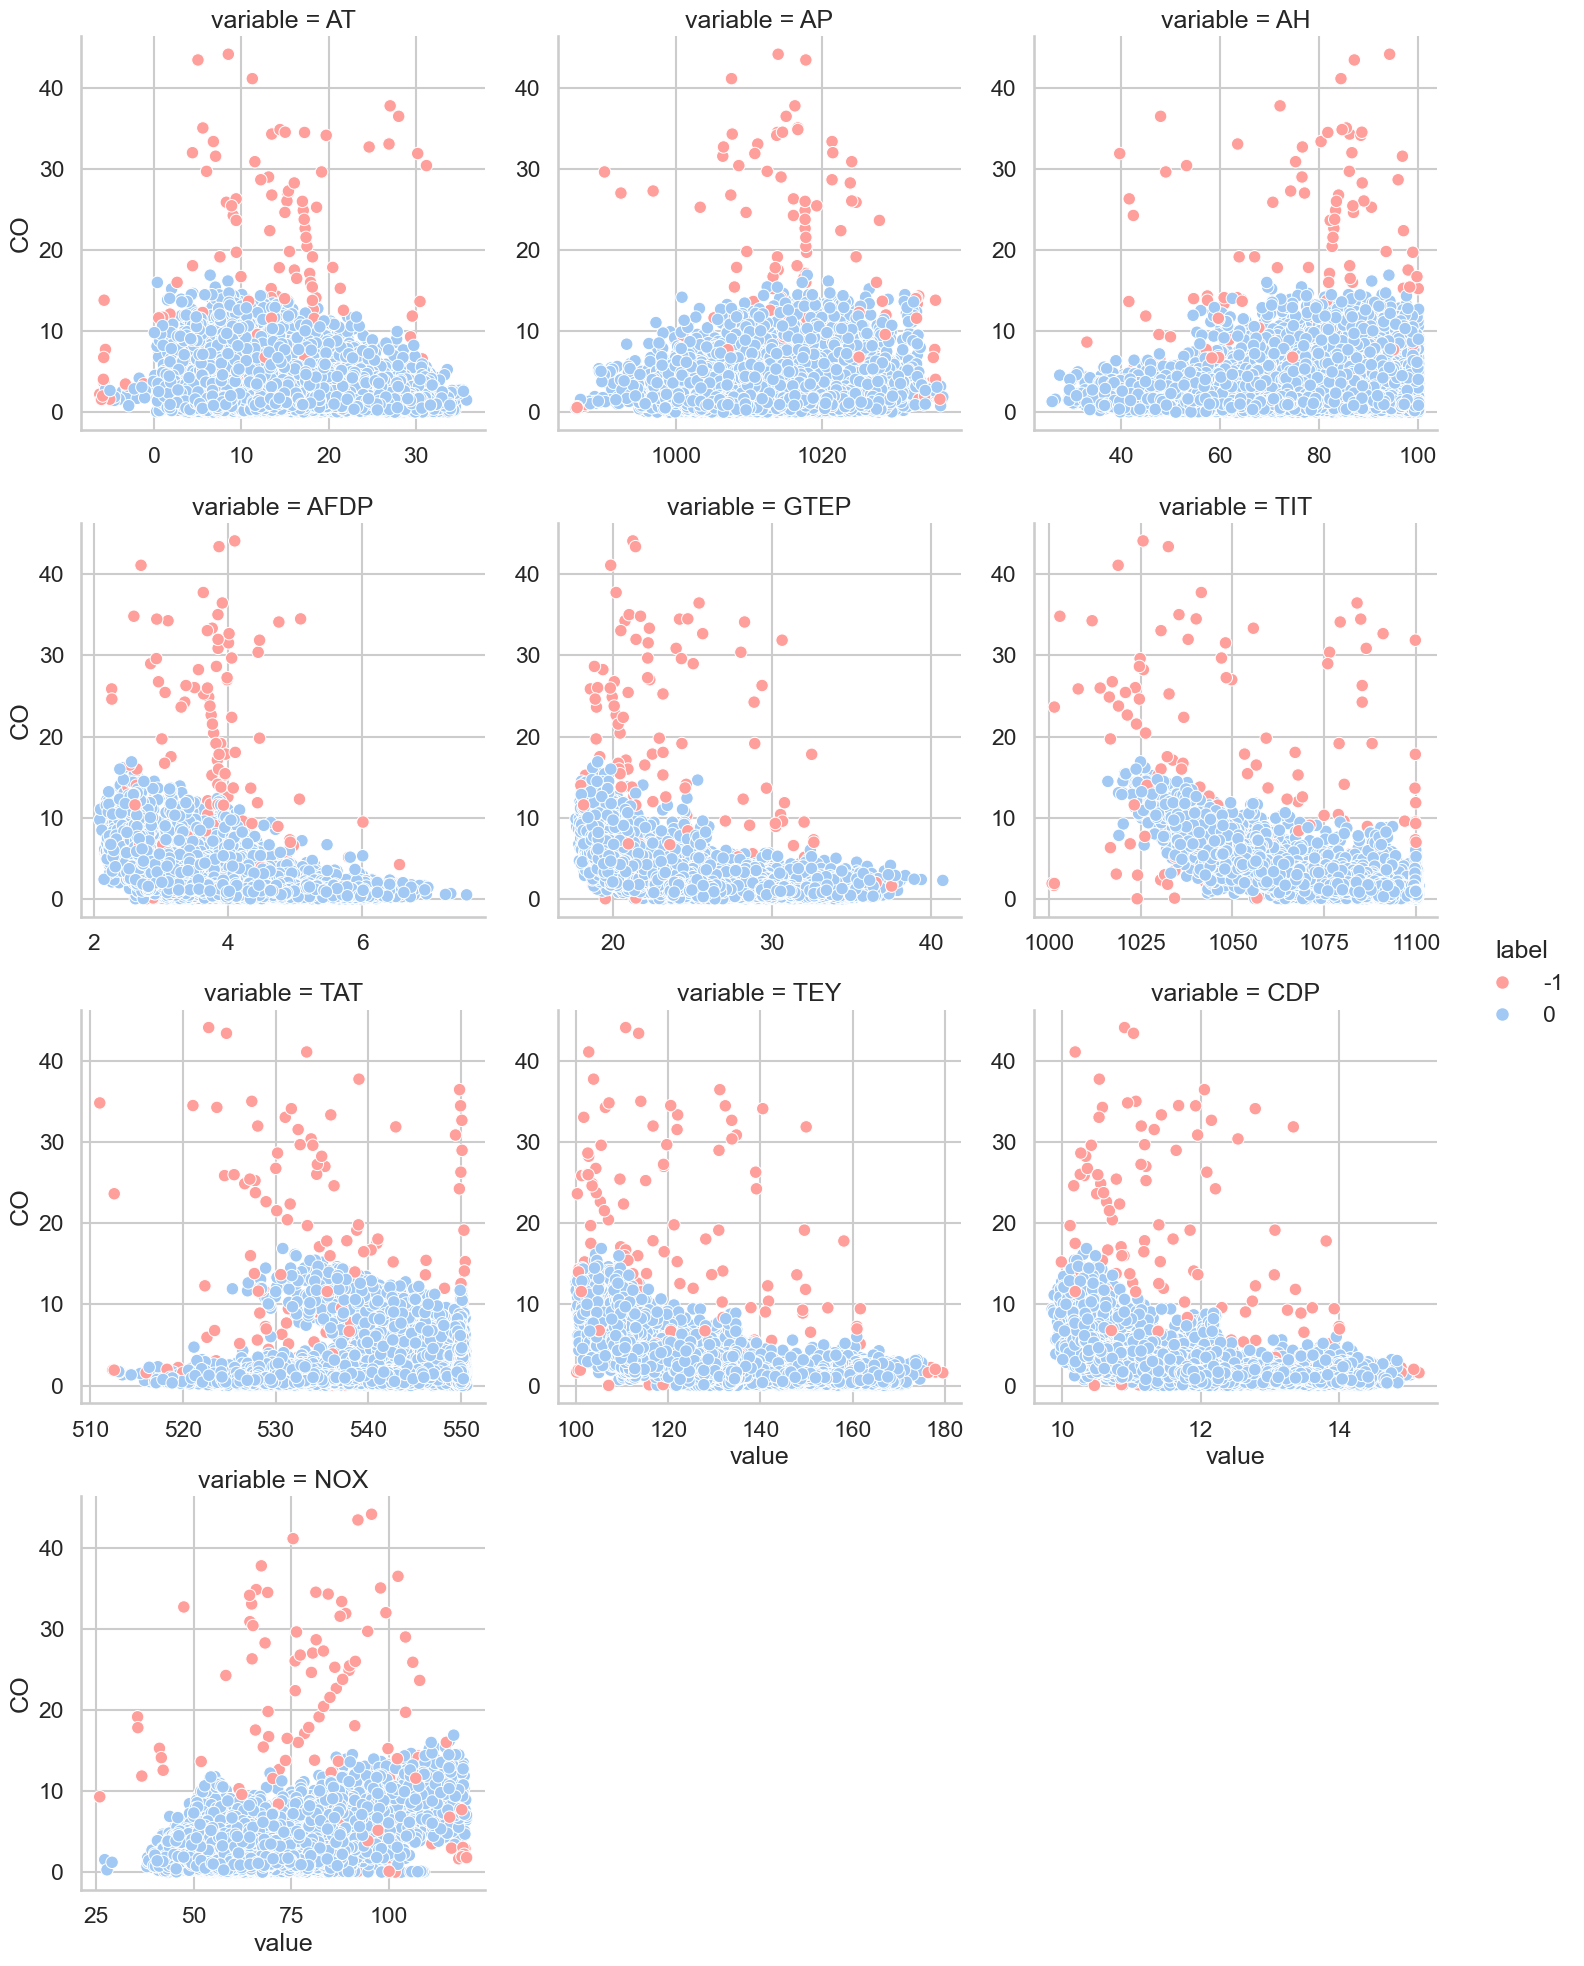

In [45]:
df_db = df_train.copy()
df_db['label'] = db.labels_

ax = sns.relplot(
    x='value',
    y='CO',
    data=df_db.melt(id_vars=['CO', 'label'], value_vars=df_db),
    col='variable',
    col_wrap=3,
    hue='label',
    palette=['r', 'b'],
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();

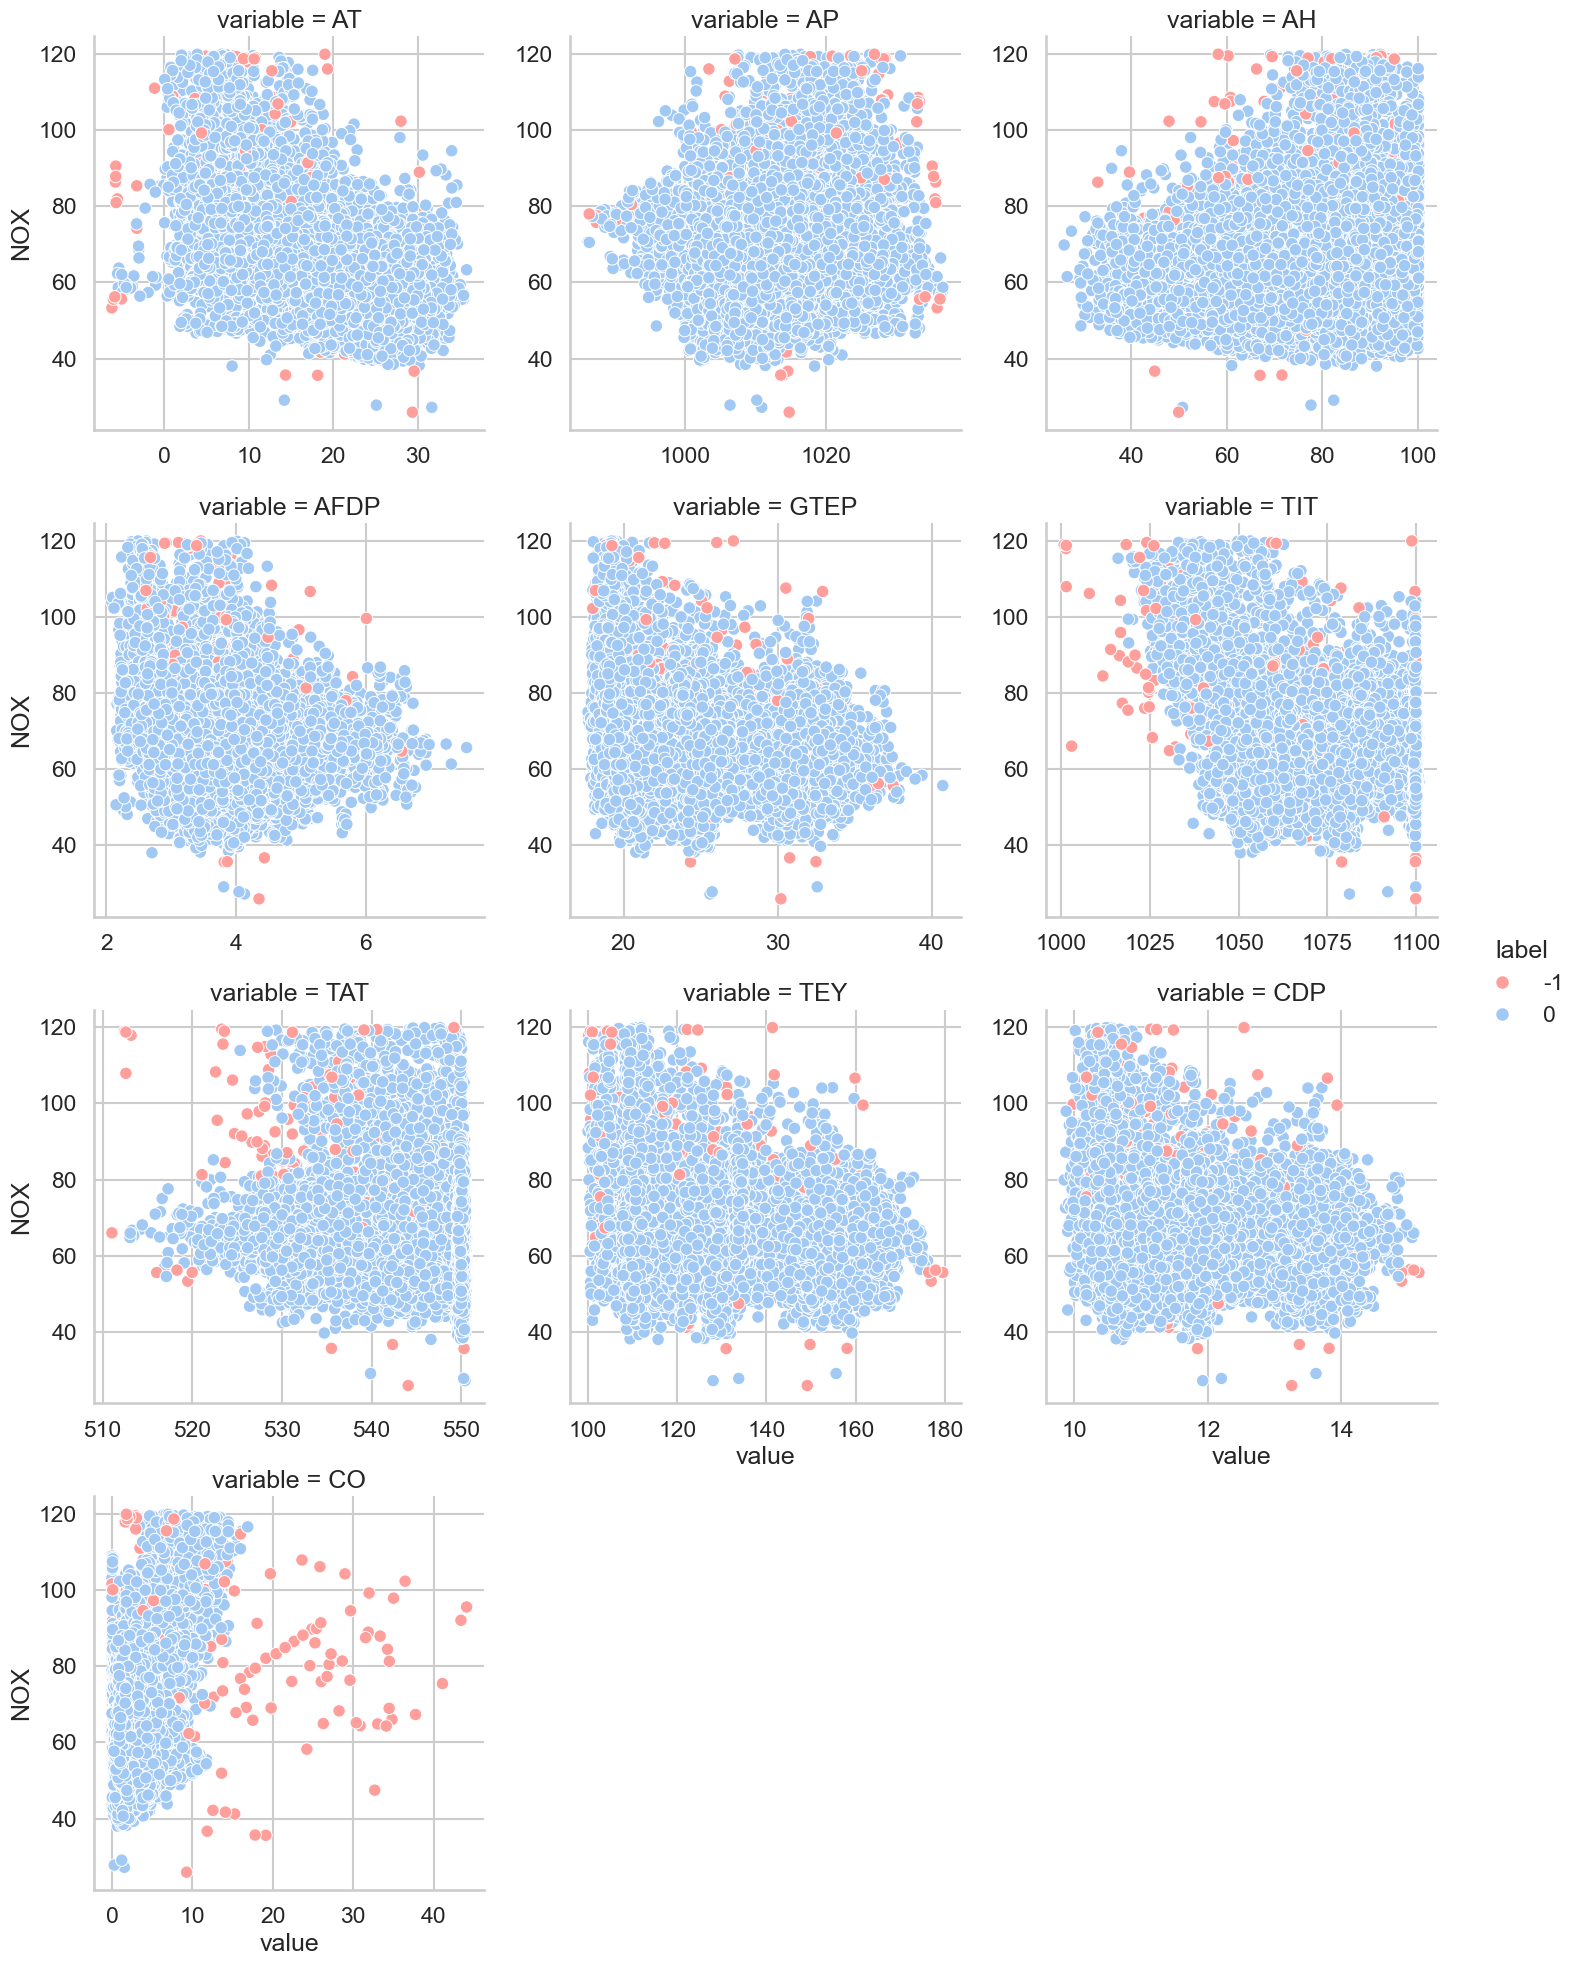

In [27]:
ax = sns.relplot(
    x='value',
    y='NOX',
    data=df_db.melt(id_vars=['NOX', 'label'], value_vars=df_db),
    col='variable',
    col_wrap=3,
    hue='label',
    palette=['r', 'b'],
    facet_kws=dict(sharex=False, sharey=False)
)
ax.tight_layout();

In [28]:
idx = db.core_sample_indices_

X_train = df_train.drop(['CO', 'NOX'], axis=1)
y_train = df_train[['CO', 'NOX']].copy()

X_test = df_test.drop(['CO', 'NOX'], axis=1)
y_test = df_test[['CO', 'NOX']].copy()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


metrics2 = defaultdict(dict)
scorers = ['neg_mean_squared_error', 'neg_mean_absolute_error']
features = ['CO', 'NOX']
for feature in features:
    for reg in (
        lin_reg,
        svc_reg,
        tre_reg, 
        rnd_reg,
        xgb_reg,
        extra_reg,
        LGBM_reg,
        MLP_reg
        ):
        scores = cross_validate(reg, X_train_std[idx], y_train[feature].iloc[idx], scoring=scorers, n_jobs=-1)
        metrics2[reg.__class__.__name__] = {
            **metrics2[reg.__class__.__name__], 
            **{
                f'{feature}_rmse': np.sqrt(-scores['test_neg_mean_squared_error']).mean(),
                f'{feature}_rmse_std': np.sqrt(-scores['test_neg_mean_squared_error']).std(),
                f'{feature}_mae': -scores['test_neg_mean_absolute_error'].mean(),
                f'{feature}_mae_std': scores['test_neg_mean_absolute_error'].std()
            }}
        
display_metrics(metrics2)

In [29]:
diff_metrics(metrics2, metrics)

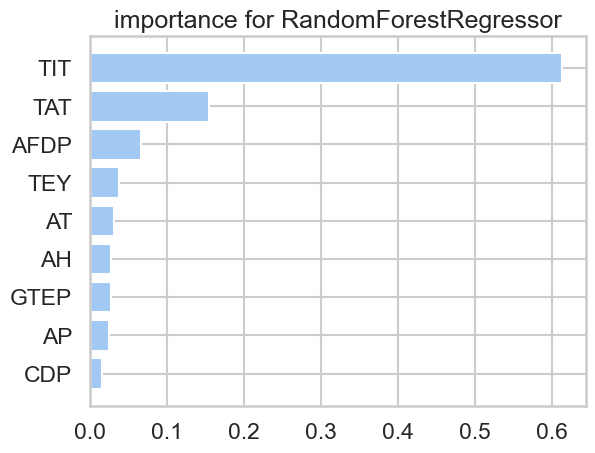

In [30]:
rnd_reg.fit(X_train_std[idx], y_train['CO'].iloc[idx])
plot_feature_importance(rnd_reg)

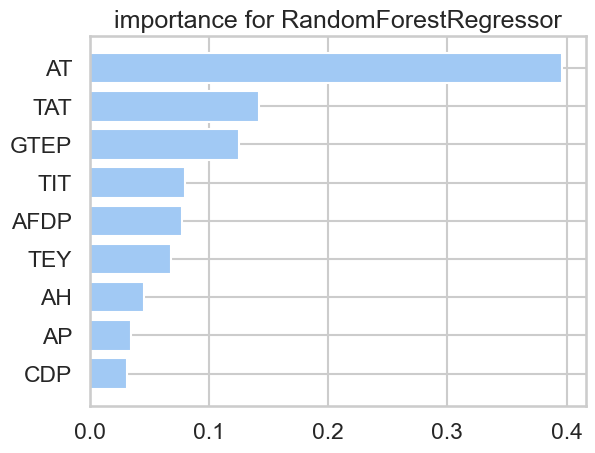

In [31]:
rnd_reg.fit(X_train_std[idx], y_train['NOX'].iloc[idx])
plot_feature_importance(rnd_reg)